# Main objective of the analysis

The main aim of this investigation is to find correlations between parameters in _CAR DETAILS FROM CARDEKHO dataset_ as well as train a linear regression model to predict the _Selling Price_ of cars. 

## Importing

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import normaltest 
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')



# Describing the dataset
This dataset contains information about used cars and is available in : https://www.kaggle.com/code/simtoor/car-price-prediction/data

In [335]:
data = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

After reading the dataset, lets explain it.

In [336]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


The columns in the given dataset are as follows:

1. name (Categorical)
2. year (Numerical)
3. selling_price (Numerical)
4. km_driven (Numerical)
5. fuel (Categorical)
6. seller_type (Categorical)
7. transmission (Categorical)
8. Owner (Categorical)

The name column is not important in prediction or interpretation, so we can remove it.

In [337]:
data = data.drop('name', axis=1)

Let's take a look at the dataset attributes to find out:
1. Non-Null Count
2. Dtypes
3. Range Index
4. mean
5. std
and so on.

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [339]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [340]:
data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Fortunately, there is no null data.

Let's focus on the categorical values:

In [341]:
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


## Dealing with outliers:



By using a boxplot, outliers could be recognized in any datasets.

<AxesSubplot:xlabel='selling_price'>

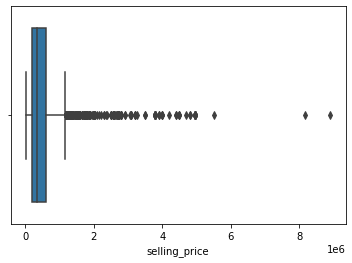

In [342]:
sns.boxplot(x=data['selling_price'])

Let's sort the dataset by price and find the indices of the outliers.

In [343]:
outliers_list = []
for x in data.index.tolist():
    if data.selling_price[x] > 1080000:
        outliers_list.append(x)

outliers_list
data = data.drop(data.index[outliers_list])

In [344]:
data.sort_values(by = 'selling_price', ascending = False)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
234,2011,1075000,160000,Diesel,Individual,Manual,Second Owner
2850,2017,1068000,36000,Petrol,Dealer,Manual,First Owner
3431,2020,1050000,1100,Petrol,Individual,Manual,First Owner
972,2018,1050000,35000,Diesel,Individual,Manual,First Owner
2293,2006,1050000,30000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...
1832,2012,35000,35000,Petrol,Individual,Manual,Third Owner
2849,2009,35000,50000,Petrol,Individual,Manual,Third Owner
2444,2004,30000,60000,Petrol,Individual,Manual,Third Owner
2495,2000,22000,42743,Petrol,Dealer,Manual,Third Owner


<AxesSubplot:xlabel='selling_price'>

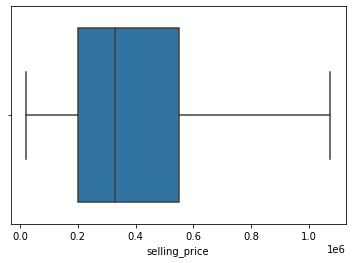

In [345]:
sns.boxplot(x=data['selling_price'])

In [346]:
rearrange = ['year','km_driven','fuel','seller_type','transmission','owner','selling_price']
data = data[rearrange]
data

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,2016,90000,Diesel,Individual,Manual,First Owner,865000


# Feature Engineering

Firstly, the categorical columns should be determined. Next, by encoding methods, categorical features convert to numerical ones. After that the correlation between parameters is explained.

In [347]:
data_ohc = data.copy()
data_le = data.copy()

In [348]:
mask = data_le.dtypes == object
categorical_cols = data_le.columns[mask]

le = LabelEncoder()
for col in categorical_cols:
    le.fit(data_le[col].drop_duplicates())
    data_le[col] = le.transform(data_le[col])


In [349]:
data_le.head(10)

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,4,1,1,0,60000
1,2007,50000,4,1,1,0,135000
2,2012,100000,1,1,1,0,600000
3,2017,46000,4,1,1,0,250000
4,2014,141000,1,1,1,2,450000
5,2007,125000,4,1,1,0,140000
6,2016,25000,4,1,1,0,550000
7,2014,60000,4,1,1,2,240000
8,2015,25000,4,1,1,0,850000
9,2017,78000,0,1,1,0,365000


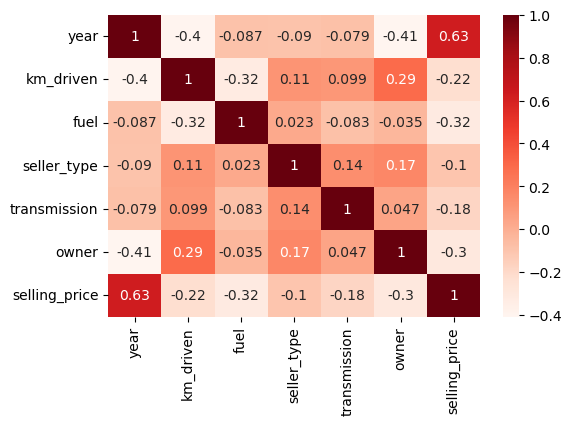

In [350]:
plt.figure(dpi=100)
sns.heatmap(np.round(data_le.corr(),100),annot=True, cmap="Reds")
plt.show()

In [351]:
one_hot_encode_cols = data_ohc.dtypes[data_ohc.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
data_ohc = pd.get_dummies(data_ohc,columns=one_hot_encode_cols)
data_ohc.head(10)

,year,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,60000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,50000,135000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,100000,600000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,46000,250000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,141000,450000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5,2007,125000,140000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
6,2016,25000,550000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
7,2014,60000,240000,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
8,2015,25000,850000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
9,2017,78000,365000,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0


In [352]:
data_ohc = data_ohc[data_ohc.columns[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,2]]]

In [353]:
plt.figure(figsize=(16,16),dpi=500)
sns.heatmap(np.round(data_ohc.corr(),100),annot=True, cmap="Reds")
plt.show()

The highest correlation is between the _year column_ and the _selling price_. Other correlations are available here:

In [354]:
a = data_ohc.corr().selling_price
a.sort_values(ascending=False)

selling_price                   1.000000
year                            0.629812
fuel_Diesel                     0.334380
owner_First Owner               0.316659
transmission_Automatic          0.179774
seller_type_Dealer              0.172942
seller_type_Trustmark Dealer    0.171598
owner_Test Drive Car            0.091986
fuel_Electric                  -0.004948
fuel_CNG                       -0.045286
fuel_LPG                       -0.069150
owner_Fourth & Above Owner     -0.127055
transmission_Manual            -0.179774
owner_Third Owner              -0.180394
owner_Second Owner             -0.208618
km_driven                      -0.222645
seller_type_Individual         -0.225542
fuel_Petrol                    -0.314283
Name: selling_price, dtype: float64

# Normality of distribution

NormaltestResult(statistic=286.9141243256767, pvalue=4.98183698637863e-63)


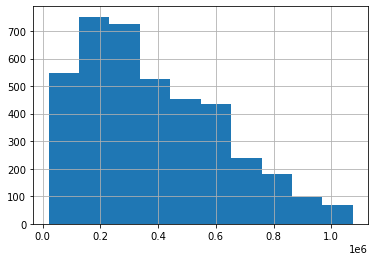

In [355]:
data_ohc.selling_price.hist()
print(normaltest(data_ohc.selling_price))

NormaltestResult(statistic=195.68111999034178, pvalue=3.223923201780794e-43)


(array([  2.,  14.,  82., 218., 353., 475., 861., 731., 857., 433.]),
 array([ 9.90348755, 10.30192192, 10.70035629, 11.09879065, 11.49722502,
        11.89565939, 12.29409375, 12.69252812, 13.09096249, 13.48939685,
        13.88783122]),
 <BarContainer object of 10 artists>)

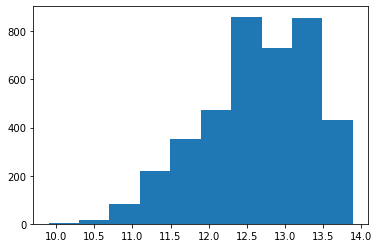

In [356]:
log_data = np.log(data_ohc.selling_price)
log_test = normaltest(log_data)
print(log_test)
plt.hist(log_data)

NormaltestResult(statistic=367.34033995326183, pvalue=1.710246415719535e-80)


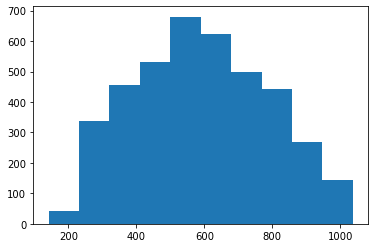

In [357]:
plt.hist(np.sqrt(data_ohc.selling_price))
sqrt_test = normaltest(np.sqrt(data_ohc.selling_price))
print(sqrt_test)

NormaltestResult(statistic=335.1562388802004, pvalue=1.6662779198428304e-73)

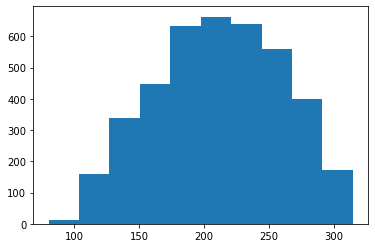

In [358]:
bc_result = boxcox(data.selling_price)
boxcox_selling_price = bc_result[0]
lam = bc_result[1]
plt.hist(boxcox_selling_price)
boxcox_test= normaltest(boxcox_selling_price,axis=0)
boxcox_test

In [359]:
d = {'Transformation': ['Square-Root', 'Log', 'Box Cox' ], 'P-value': [sqrt_test[1], log_test[1], boxcox_test[1]]}
df_results = pd.DataFrame(data=d)
df_results

,Transformation,P-value
0,Square-Root,1.710246e-80
1,Log,3.223923e-43
2,Box Cox,1.666278e-73


Unfortunately, the dataset could not be normaly distributed. But based on P-values, we continue with log transform.

# Searching for appropriatre Linear Regression method

In [360]:
X = data_ohc.drop('selling_price',axis=1)
Y = np.log(data_ohc.selling_price.values)
y = data_ohc.selling_price
kf = KFold(shuffle=True, n_splits=3 , random_state= 68)

### Linear regression vanilla

In [361]:
estimator = Pipeline([('StandardScaler', StandardScaler()), 
                    ('polynomial_features',PolynomialFeatures()),
                    ('Linear_Regression',LinearRegression())])

Params = {'polynomial_features__degree' : [1 , 2 , 3 ]}

grid = GridSearchCV(estimator, Params , cv = kf)

grid.fit(X,Y)

print(grid.best_score_
        ,grid.best_params_,
        )


-4.998886065657453e+16 {'polynomial_features__degree': 3}


In [362]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=3)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X, Y)
best_vanilla_estimator.score(X, Y)


0.6787396823096855

### Lasso regression

In [363]:
estimator = Pipeline([('StandardScaler', StandardScaler()), 
                    ('polynomial_features',PolynomialFeatures()),
                    ('Lasso_Regression', Lasso())])

Params = {'polynomial_features__degree' : [1 , 2 , 3 ],
          'Lasso_Regression__alpha' :  np.geomspace(0.001, 0.01, 10)}

grid = GridSearchCV(estimator, Params , cv = kf)

grid.fit(X,Y)

print(grid.best_score_
        ,grid.best_params_,
        )


0.6514856260645772 {'Lasso_Regression__alpha': 0.003593813663804626, 'polynomial_features__degree': 3}


In [364]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=3)),
                    ("lasso_regression", Lasso(alpha=0.0032745491628777285))])

best_lasso_estimator.fit(X, Y)
best_lasso_estimator.score(X, Y)

0.6746830886858817

### Ridge regression

In [366]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1,2,3],
    "ridge_regression__alpha": np.geomspace(1, 60, 10)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, Y)
grid.best_score_, grid.best_params_

(0.6479230336357079,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 38.06965045228559})

In [367]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Ridge(alpha=38.06965045228559))])

best_ridge_estimator.fit(X, Y)
best_ridge_estimator.score(X, Y)

0.6593766113439496

In [368]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# Regression Models

In [369]:
pf = PolynomialFeatures(degree=1)
s = StandardScaler()

X_pf = pf.fit_transform(X,)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, Y,
                                                    shuffle=True, test_size=0.3, random_state=68)


In [370]:
linearRegression = LinearRegression().fit(X_train,y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test,linearRegression.predict(X_test)) 
print(linearRegression_rmse,linearRegression_R2)

0.4216812801606745 0.6573786752448609


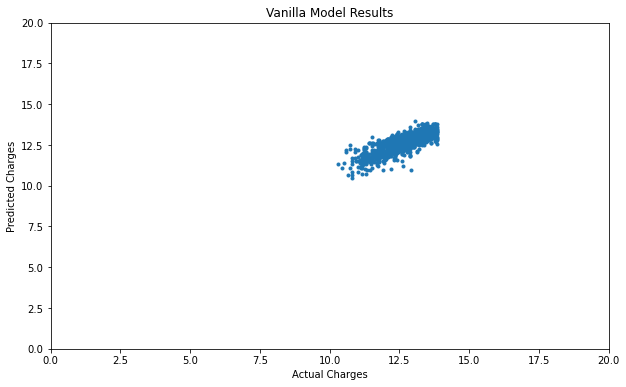

In [371]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, 20)

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Model Results');

In [372]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.001, 1, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(lassoCV_R2)

0.001355601785329369 0.42171293936801924
0.6573272263081196


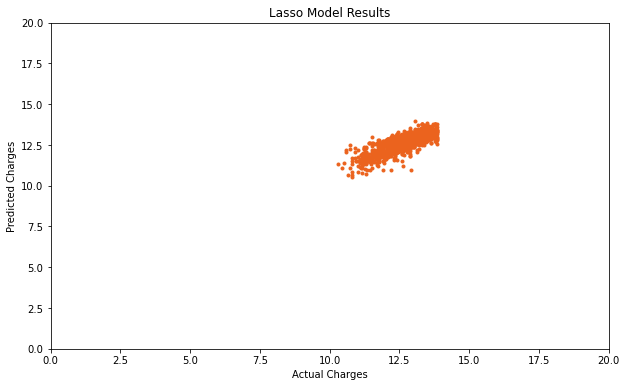

In [373]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, 20)

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Lasso Model Results');

In [374]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, Y,
                                                    shuffle=True, test_size=0.3, random_state=42)

In [375]:
from sklearn.linear_model import RidgeCV

alphas = np.geomspace(10, 100, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

print(ridgeCV.alpha_, ridgeCV_rmse)
print(ridgeCV_R2)

100.0 0.42098767790593355
0.6360534305575678


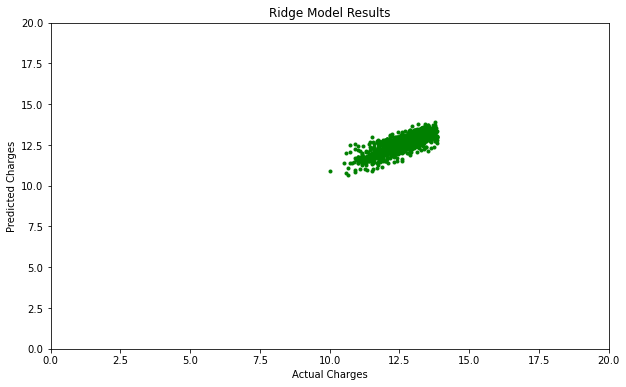

In [376]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', color='g', ms=3.0)

lim = (0, 20)

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results');

In [377]:
from sklearn.linear_model import ElasticNetCV
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
print(ridgeCV_R2)

0.008697490026177835 0.1 0.42085730639816915
0.6360534305575678


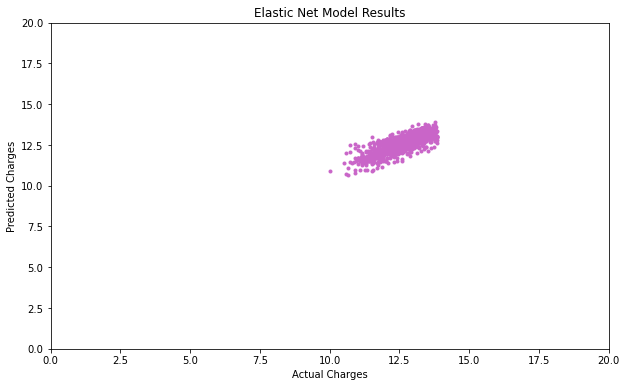

In [378]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', color='#c965c8', ms=3.0)

lim = (0, 20)

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Elastic Net Model Results');

# A Comparison between different methods

In [379]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,0.421681,0.657379
Lasso,0.421713,0.657327
Ridge,0.420988,0.636053
ElasticNet,0.420857,0.636279


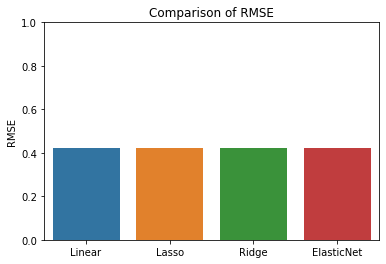

In [380]:
ax = plt.axes()

sns.barplot(labels,rmse_vals)
ax.set(
       ylabel='RMSE', 
       ylim=(0,1),
       title='Comparison of RMSE'
       );

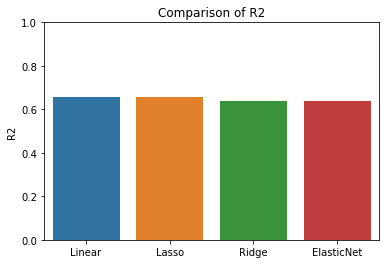

In [381]:
ax = plt.axes()

sns.barplot(labels,R2_vals)
ax.set(
       ylabel='R2', 
       ylim=(0,1),
       title='Comparison of R2'
       );

According to comparisons, vanilla linear regression would be the best option because of its simplicity and precision.